In [4]:
import pandas as pd
import numpy as np
import sqlalchemy as sqla
from io import StringIO

#establish connection to database
conn = sqla.create_engine('sqlite:///yelp.sqlite')

In [8]:
#split business.json into bussines, attributes, hours and store in a database 
business=pd.read_json("/Users/sihuili/Downloads/yelp_dataset/yelp_academic_dataset_business.json",lines=True)
business.set_index("business_id",inplace=True)

business.drop(["hours","attributes"],axis=1,inplace=True)

business.to_sql('business',conn,if_exists="replace")

In [10]:
import pandas as pd
import numpy as np
import sqlalchemy as sqla
from collections import Counter


#read in business table
conn = sqla.create_engine('sqlite:///yelp.sqlite')
business=pd.read_sql_table("business",conn)


#assign a simple category to each business
business.replace("",np.nan,inplace=True)
business.fillna({"categories":"Not Avaliable"},inplace=True)
business["categories"]=business.categories.str.replace(" ","")
category=business.categories.str.split(",")
category=category.apply(Counter)
combined_category=Counter()
for c in category:
    combined_category.update(c)
cate_count=pd.DataFrame.from_dict(combined_category,"index").reset_index().sort_values(0,ascending=False)
cate_count.columns=["name","count"]
simple_category=[]
for row in business.categories.str.split(","):
    for category in cate_count["name"]:
        if category in row:
            simple_category.append(category)
            break
business.categories=pd.Series(simple_category)

In [9]:
business

,address,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
business_id,,,,,,,,,,,,
Apn5Q_b6Nz61Tq4XzPdf9A,1314 44 Avenue NE,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
AjEbIBw6ZFfln7ePHha9PA,,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
O8S5hYJ1SMc8fA4QBtVujA,1335 rue Beaubien E,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
bFzdJJ3wp3PZssNEsyU23g,211 W Monroe St,"Insurance, Financial Services",Phoenix,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
8USyCYqpScwiNEb58Bt6CA,2005 Alyth Place SE,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB
45bWSZtniwPRiqlivpS8Og,"20235 N Cave Creek Rd, Ste 1115","Coffee & Tea, Food",Phoenix,1,33.671375,-112.030017,The Coffee Bean & Tea Leaf,,85024,63,4.0,AZ
9A2quhZLyWk0akUetBd8hQ,631 Bloor St W,"Food, Bakeries",Toronto,0,43.664378,-79.414424,Bnc Cake House,Koreatown,M6G 1K8,7,4.0,ON
6OuOZAok8ikONMS_T3EzXg,"3417 Derry Road E, Unit 103","Restaurants, Thai",Mississauga,1,43.712946,-79.632763,Thai One On,Ridgewood,L4T 1A8,7,2.0,ON
8-NRKkPY1UiFXW20WXKiXg,1440 N. Dysart Ave,"Mexican, Restaurants",Avondale,1,33.448106,-112.341302,Filiberto's Mexican Food,,85323,40,2.5,AZ


In [6]:

attributes=pd.DataFrame.from_dict(business["attributes"].dropna().to_dict(),orient="index")
attributes.index.name="business_id"

hours=pd.DataFrame.from_dict(business["hours"].dropna().to_dict(),orient="index")
hours.index.name="business_id"


hours.to_sql('hours',conn,if_exists="replace")
attributes.to_sql('attributes',conn,if_exists="replace")

#convert checkin.json into clean and neat dataframe and store in the database
checkins=pd.read_json("/Users/sihuili/Downloads/yelp_dataset/yelp_academic_dataset_checkin.json",lines=True,orient="record",chunksize=10000)
for checkin in checkins:
    checkin.set_index("business_id",inplace=True)
    checkin=pd.DataFrame.from_dict(checkin["time"].to_dict(),orient="index")
    checkin.reset_index(inplace=True)
    checkin=checkin.melt(id_vars="index")
    days=pd.read_table(StringIO(checkin['variable'].to_csv(None,index=None)),sep='-',header=None)
    checkin=checkin.join(days)
    checkin.drop("variable",axis=1,inplace=True)
    checkin=checkin[["index",0,1,"value"]]
    checkin.columns=["business_id","weekday","hour","checkins"]
    checkin.set_index("business_id",inplace=True)
    checkin["weekday"]=checkin["weekday"].astype("category")
    checkin.dropna(inplace=True)
    checkin.to_sql('checkin',conn,if_exists="append")

#store review.json into the database
reviews=pd.read_json("/Users/sihuili/Downloads/yelp_dataset/yelp_academic_dataset_review.json",chunksize=100000,lines=True)
for review in reviews:
    review.set_index("business_id",inplace=True)
    review.to_sql("review",conn,if_exists="append")

In [7]:
import sqlite3
conn = sqlite3.connect('yelp.sqlite')
c = conn.cursor()

In [8]:
cursor = c.execute(''' Select * from checkin; ''')
business_id = []
day_of_week = []
checkin_hours = []
check_in_counts = []
for i in cursor:
    business_id.append(i[0])
    day_of_week.append(i[1])
    checkin_hours.append(i[2])
    check_in_counts.append(i[3])

In [31]:
checkin_df = pd.DataFrame({'business_id':business_id, 'day_of_week':day_of_week, 'checkin_hours':checkin_hours, 'check_in_counts':check_in_counts})

checkin_data = checkin_df.fillna("0")

checkin_df.to_csv("checkin.csv")

In [1]:
#business.to_csv("business.csv")
#hours.to_csv("hours.csv")
#attributes.to_csv("attributes.csv")

NameError: name 'business' is not defined

In [33]:
import pandas as pd
business = pd.read_csv("business.csv")
hours = pd.read_csv("hours.csv")
attributes = pd.read_csv("attributes.csv")

In [14]:
checkin = pd.read_csv("checkin.csv")

# Find the businesses with top 10 number of checkin counts

In [178]:
unique_checkin_counts = checkin_df.groupby("business_id")["check_in_counts"].sum()

checkin_top10 = unique_checkin_counts.sort_values(ascending = False)[:10]


In [180]:
top10names = [list(business.name[business.index == i]) for i in checkin_top10.index]
top10names

[['McCarran International Airport'],
 ['Phoenix Sky Harbor International Airport'],
 ['Charlotte Douglas International Airport'],
 ['The Cosmopolitan of Las Vegas'],
 ['Kung Fu Tea'],
 ['ARIA Resort & Casino'],
 ['The Venetian Las Vegas'],
 ['Bellagio Hotel'],
 ['MGM Grand Hotel'],
 ['Caesars Palace Las Vegas Hotel & Casino']]

In [218]:
checkin_top10_df = pd.DataFrame({'business': [i[0] for i in top10names], 'counts': checkin_top10})
checkin_top10_df.reset_index(drop=True, inplace=True)

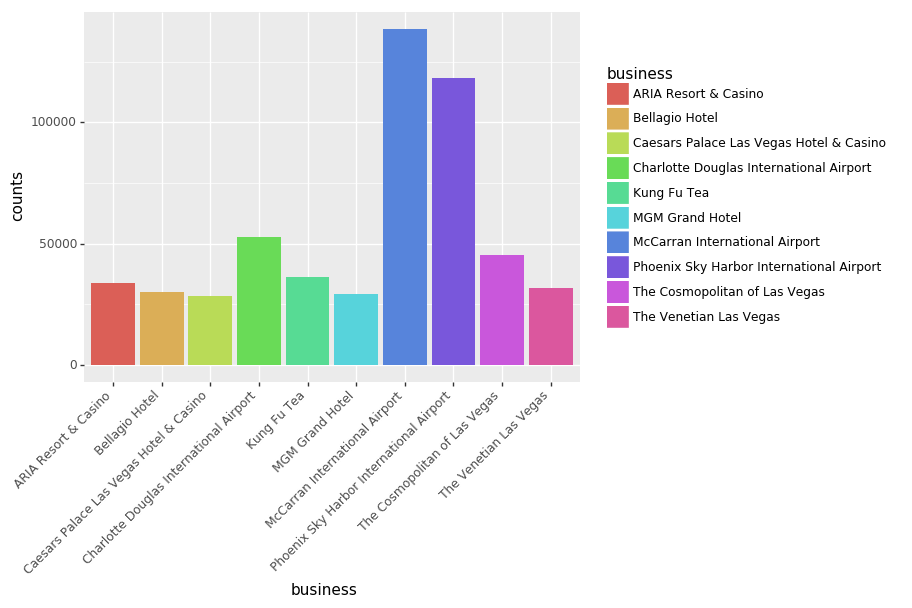

<ggplot: (328785451)>

In [230]:
p9.ggplot(checkin_top10_df, p9.aes(x='business', y='counts', fill = 'business')) + \
 p9.geom_bar(stat='identity') + \
 p9.theme(axis_text_x=p9.element_text(rotation=45, hjust=1))

# which day of week has the highest number of checkin counts?

In [87]:
checkin_dow_total = checkin_df.groupby('day_of_week')['check_in_counts'].sum().sort_values(ascending = False)
checkin_dow_total

day_of_week
Sat    3545990.0
Sun    3240853.0
Fri    2569730.0
Thu    2211971.0
Wed    2146794.0
Mon    2134388.0
Tue    2066158.0
Name: check_in_counts, dtype: float64

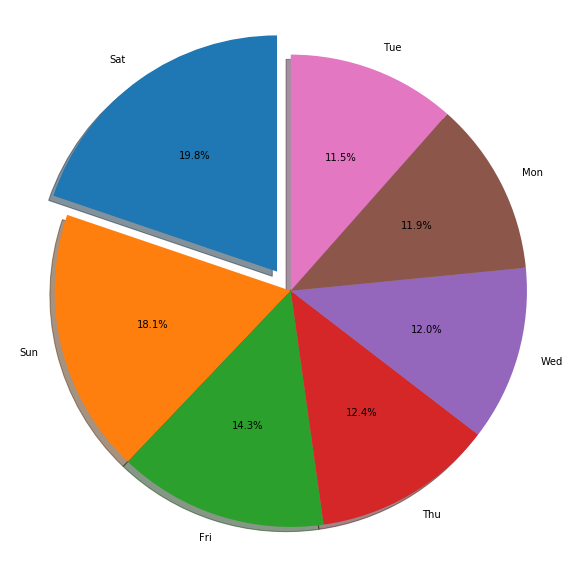

<Figure size 1440x1440 with 0 Axes>

In [88]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(checkin_dow_total.index)
sizes = np.array(checkin_dow_total/sum(checkin_dow_total)).round(4)*100
explode = (0.1, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# which time period has the most checkin counts?

In [92]:
checkin_df.head()

,business_id,day_of_week,checkin_hours,check_in_counts
0,--cZ6Hhc9F7VkKXxHMVZSQ,Fri,0,18.0
1,-06-Fdi30wJx-JA8P7CAng,Fri,0,2.0
2,-0CTrPQNiSyClxhdO4HSDQ,Fri,0,2.0
3,-1xCh7Cocn6IwFzhELyohA,Fri,0,2.0
4,-5L8zOxibac-vBrsYtxXbQ,Fri,0,18.0


In [100]:
checkin_hours_total = checkin_df.groupby("checkin_hours")['check_in_counts'].sum()
checkin_hours_top10 = checkin_df.groupby("checkin_hours")['check_in_counts'].sum().sort_values(ascending = False)[:10]

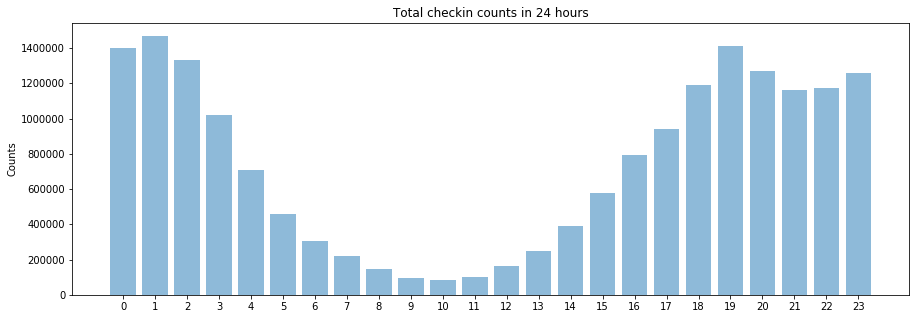

In [115]:
objects = checkin_hours_total.index
y_pos = np.arange(len(objects))
performance = list(checkin_hours_total)

fig2, ax1 = plt.subplots(figsize=(15, 5))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Total checkin counts in 24 hours')

plt.show()

# Build a regression model for checkin counts. 

Response: checkin counts
Predictors: noise level, appointment, outdoorseating, good for kids,

In [127]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)

In [92]:
business.index = business.business_id

checkin_df = checkin
unique_checkin_counts = checkin_df.groupby("business_id")["check_in_counts"].sum()

unique_checkin_counts = pd.DataFrame(unique_checkin_counts)
unique_checkin_counts['business_id']

checkin_merge = pd.concat([business, unique_checkin_counts], axis=1, sort=False)

checkin_with_business = checkin_merge[~np.isnan(checkin_merge.check_in_counts)]

y = checkin_with_business['check_in_counts']

In [138]:
import warnings
import plotnine as p9
warnings.filterwarnings("ignore")
checkin_with_business['restaurants'] = checkin_with_business['categories'].apply(lambda x: x in ["Restaurants", "Food"])
checkin_with_business['shopping'] = (checkin_with_business['categories'].apply(lambda x: x in ["Shopping", "Automotive"]))
checkin_with_business['beauty_spas'] = (checkin_with_business['categories'] == "Beauty&Spas")
checkin_with_business['nightlife'] = (checkin_with_business['categories'].apply(lambda x: x in ["ActiveLife", \
"Nightlife", "Hotels&Travel", "Arts&Entertainment"]))
checkin_with_business['service'] = checkin_with_business['categories'].apply(lambda x: x in ["Health&Medical", \
"HomeServices", "LocalServices","EventPlanning&Services","FinancialServices","ProfessionalServices","PublicServices&Government"])
checkin_with_business['other'] = checkin_with_business['categories'].apply(lambda x: x in ["Pets", \
"Education", "ReligiousOrganizations","NotAvaliable","LocalFlavor","MassMedia"])

x = checkin_with_business[['review_count', 'stars', 'restaurants', 'shopping', 'beauty_spas', 'nightlife', 'service', 'other']]

In [142]:
checkin_with_business.isna().sum()

business_id            0
address             3021
categories             0
city                   7
is_open                0
latitude               3
longitude              2
name                   0
neighborhood       97144
postal_code          371
review_count           0
stars                  0
state                  0
check_in_counts        0
restaurants            0
shopping               0
beauty_spas            0
nightlife              0
service                0
other                  0
dtype: int64

In [148]:
regress_fit = reg.fit(x,y)

In [149]:
regress_fit.coef_

array([  4.08632646, -15.71695744, -50.28028377,   8.91467158,
       -28.72261981,  74.97416723,  -8.95081547,   4.06488024])

In [150]:
regress_fit.intercept_

37.87675945501245

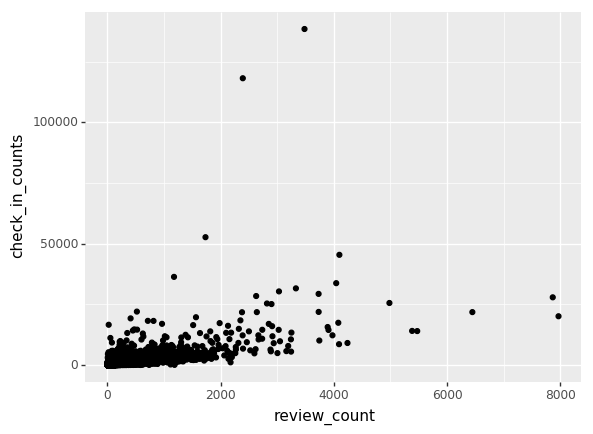

<ggplot: (333447628)>

In [167]:
# relationship between review count and number of checkin
p9.ggplot(checkin_with_business) + p9.aes(x = "review_count", y = "check_in_counts") + p9.geom_point()

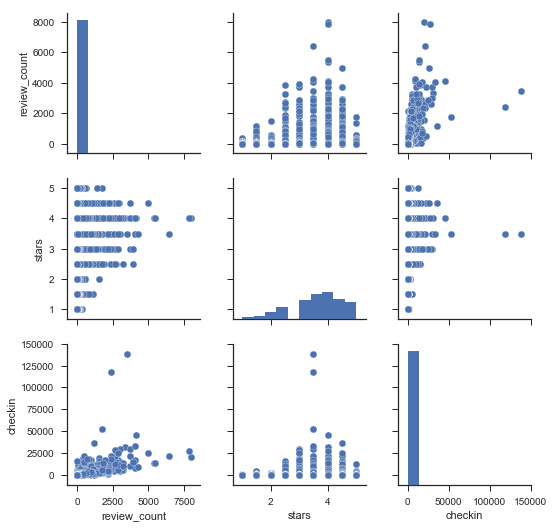

In [176]:
import seaborn as sns
#sns.set(style="ticks")
scatterplot_df = x[['review_count', 'stars']]
scatterplot_df['checkin'] = y
sns.pairplot(scatterplot_df)